# Projeto Reconhecimento de Dígitos Manuscritos

## Etapas:

- **Carregar Dados:** Importamos o dataset MNIST para separá-lo em conjuntos de treino e teste.
- **Definir Modelo Keras:** Construímos uma rede neural utilizando a API sequencial do Keras.
- **Compilar Modelo Keras:** Configuramos o modelo com otimizador, função de perda e métricas.
- **Ajustar (Fit) Modelo Keras:** Treinamos o modelo nos dados de treinamento e monitoramos o desempenho no conjunto de validação.
- **Avaliar (Evaluate) Modelo Keras:** Calculamos a perda e a acurácia no conjunto de teste.
- **Fazer Previsões (Predict):** Realizamos predições no conjunto de teste e em dados externos para avaliar a capacidade de generalização.

### Validade das Alterações

- Testar arquiteturas diferentes é uma prática essencial para explorar o potencial do modelo em aprender e generalizar.
- O aumento no número de épocas combinado com `EarlyStopping` demonstrou ser eficaz para refinar os resultados sem risco de overfitting.

### Desempenho Geral

1. **Ausência de Overfitting:**
   - A perda de validação estabilizou e não aumentou, enquanto a acurácia de validação permaneceu próxima à acurácia de treino.

2. **Desempenho em Dados Externos:**
   - O modelo apresentou boa generalização, mas ainda é sensível a variações significativas no domínio dos dados.


## Etapa 1: Configuração Inicial
Configuramos o ambiente para garantir que a execução seja limpa e sem interferências de logs desnecessários.

In [1]:
import os
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from src.config import PASTA_DADOS  # Importe as configurações do config.py

os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [3]:
mnist = keras.datasets.mnist

In [4]:
mnist

<module 'keras.api._v2.keras.datasets.mnist' from 'C:\\Users\\Usuario\\anaconda3\\envs\\projeto_mnist\\lib\\site-packages\\keras\\api\\_v2\\keras\\datasets\\mnist\\__init__.py'>

## Etapa 2: Carregamento do Dataset MNIST
Carregamos o dataset MNIST, que contém imagens de dígitos escritos à mão, separadas em conjuntos de treino e teste.

In [5]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [6]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## Etapa 3: Pré-Processamento e Visualização
Visualizamos algumas amostras do conjunto de treino para melhor compreensão dos dados.

In [7]:
type(x_train[0])

numpy.ndarray

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train[0][0].shape

(28,)

In [10]:
y_train.shape

(60000,)

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [12]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [13]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [14]:
contagem = tuple(zip(*np.unique(y_train, return_counts=True)))
contagem

((0, 5923),
 (1, 6742),
 (2, 5958),
 (3, 6131),
 (4, 5842),
 (5, 5421),
 (6, 5918),
 (7, 6265),
 (8, 5851),
 (9, 5949))

In [15]:
for par in contagem:
    print(f"{par[0]}: {par[1] / len(y_train) * 100:.2f}%")

0: 9.87%
1: 11.24%
2: 9.93%
3: 10.22%
4: 9.74%
5: 9.04%
6: 9.86%
7: 10.44%
8: 9.75%
9: 9.92%


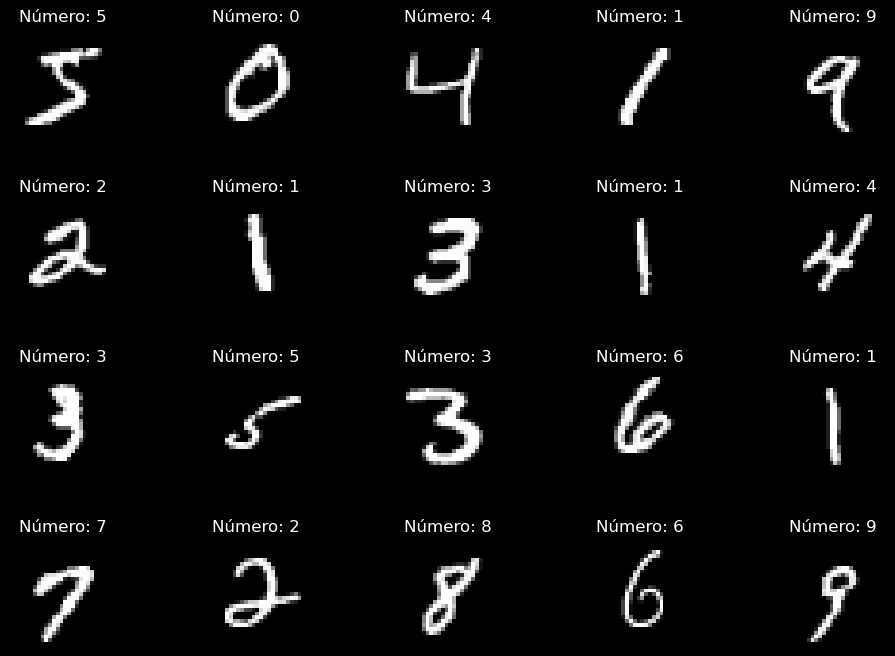

In [17]:
fig, axs = plt.subplots(4, 5, figsize=(12, 8))
fig.patch.set_facecolor('black')
for i, ax in enumerate(axs.flat):
    ax.imshow(x_train[i], cmap="gray")
    ax.set_title(f"Número: {y_train[i]}", color="white")
    ax.axis("off")

fig.subplots_adjust(hspace=0.6)

plt.show()

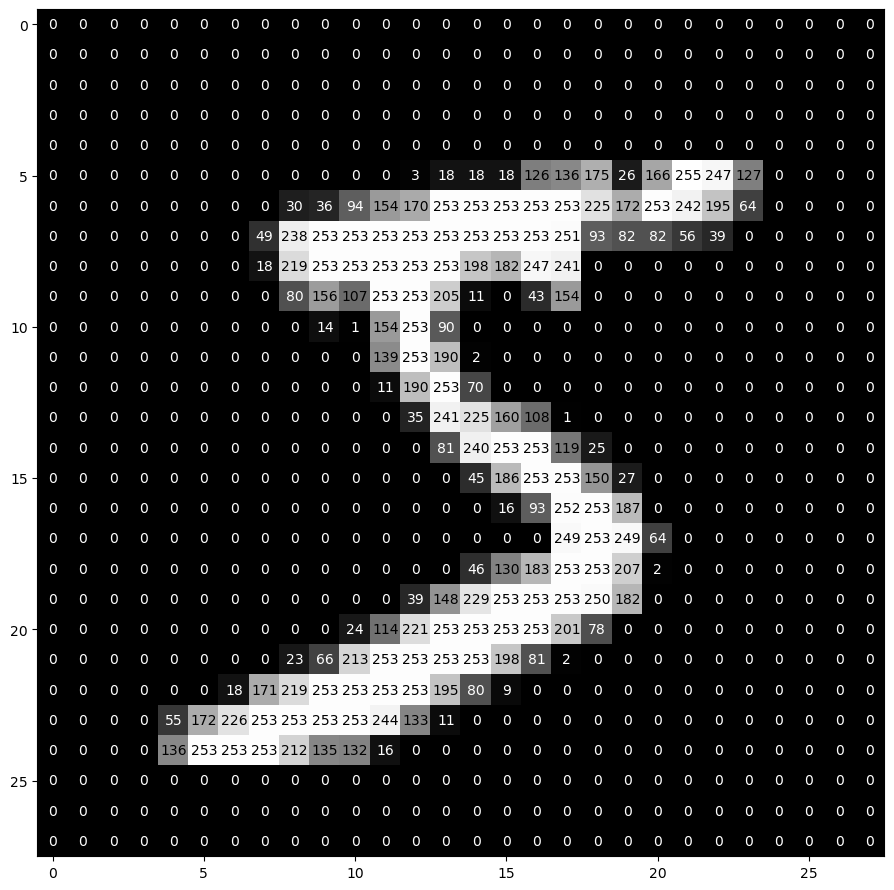

In [18]:
fig, ax = plt.subplots(figsize=(11, 11))


ax.imshow(x_train[0], cmap="gray")

for linha in range(28):
    for coluna in range(28):
        valor = x_train[0][linha][coluna]
        ax.annotate(
            str(valor),
            xy=(coluna, linha),
            color="black" if valor > 100 else "white",
            horizontalalignment="center",
            verticalalignment="center",
        )

plt.show()

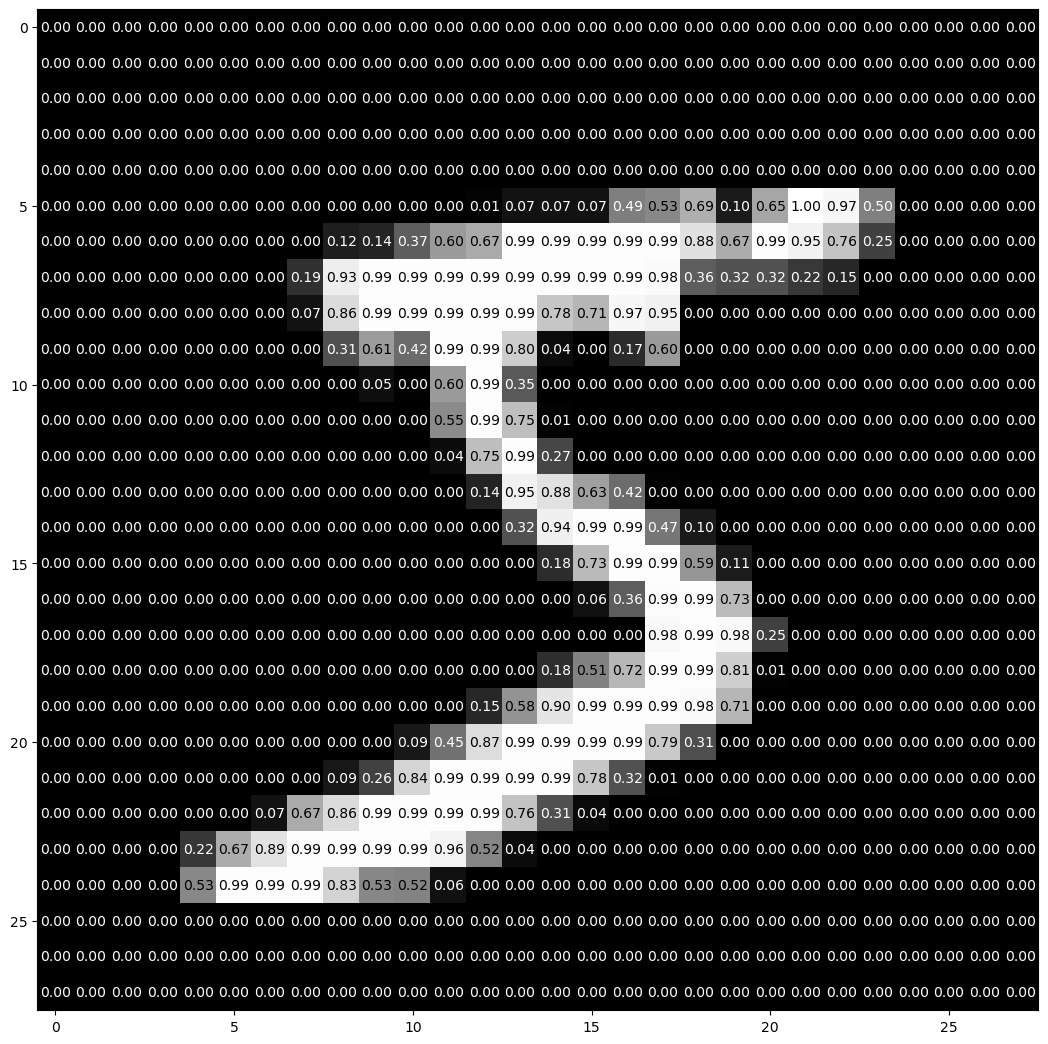

In [19]:
fig, ax = plt.subplots(figsize=(13, 13))


ax.imshow(x_train[0] / 255, cmap="gray")

for linha in range(28):
    for coluna in range(28):
        valor = x_train[0][linha][coluna] / 255
        ax.annotate(
            f"{valor:.2f}",
            xy=(coluna, linha),
            color="black" if valor > 0.5 else "white",
            horizontalalignment="center",
            verticalalignment="center",
        )

plt.show()

## Justificativa para Testar Alterações no Modelo
Explorar diferentes arquiteturas de rede neural é fundamental para identificar o melhor equilíbrio entre desempenho e generalização. Nesta seção, discutimos as alterações realizadas no modelo e analisamos seus impactos nos resultados.

---

## Novo Modelo Ajustado

In [20]:
model = keras.models.Sequential()

model.add(keras.layers.InputLayer(input_shape=(28, 28)))
model.add(keras.layers.Rescaling(scale=1./255))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(256, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 28, 28)            0         
                                                                 
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)                2

### Alterações em Relação ao Modelo Anterior

1. **Aumento do Número de Neurônios:**
   - A primeira camada densa agora possui 512 neurônios e a segunda possui 256 neurônios.
   - Esse aumento permite ao modelo aprender representações mais complexas dos dados.

2. **Uso de Dropout:**
   - Dropout de 50% em ambas as camadas densas reduz a chance de overfitting ao desligar aleatoriamente metade dos neurônios durante o treinamento.

3. **Mantida a Ativação Softmax na Saída:**
   - A camada final com ativação `softmax` transforma os valores de saída em probabilidades, ideal para classificação multiclasse.

4. **Número Total de Parâmetros:**
   - Total de 535.818 parâmetros treináveis, um aumento significativo em comparação ao modelo anterior.

---

## Etapa 5: Compilação do Modelo
Configuramos o modelo para o treinamento.

In [21]:
optimizer = keras.optimizers.Adam(learning_rate=1E-4)
loss = keras.losses.SparseCategoricalCrossentropy()
metric = keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer=optimizer, loss=loss, metrics=[metric])

- `Adam`: Otimizador eficiente que combina as vantagens do Momentum e do RMSProp.
- `SparseCategoricalCrossentropy`: Função de perda utilizada para classificação multiclasse.
- `SparseCategoricalAccuracy`: Métrica de acurácia para avaliar o desempenho do modelo.

---

## Etapa 6: Treinamento do Modelo
### Treinamento com Aumento de Épocas

Treinamos o modelo nos dados normalizados e utilizamos validação para monitorar o desempenho.

In [22]:
early_stop = keras.callbacks.EarlyStopping(
    patience=5,
    verbose=1,
    min_delta=1E-4,
)

history = model.fit(
    x_train,
    y_train,
    epochs=300,
    batch_size=128,
    validation_split=0.2,
    callbacks=[early_stop],
)

Epoch 1/300
375/375 [==============================] - 5s 11ms/step - loss: 1.1168 - sparse_categorical_accuracy: 0.6503 - val_loss: 0.3720 - val_sparse_categorical_accuracy: 0.8976
Epoch 2/300
375/375 [==============================] - 4s 10ms/step - loss: 0.4850 - sparse_categorical_accuracy: 0.8548 - val_loss: 0.2683 - val_sparse_categorical_accuracy: 0.9226
Epoch 3/300
375/375 [==============================] - 4s 10ms/step - loss: 0.3754 - sparse_categorical_accuracy: 0.8901 - val_loss: 0.2220 - val_sparse_categorical_accuracy: 0.9360
Epoch 4/300
375/375 [==============================] - 4s 11ms/step - loss: 0.3108 - sparse_categorical_accuracy: 0.9076 - val_loss: 0.1921 - val_sparse_categorical_accuracy: 0.9433
Epoch 5/300
375/375 [==============================] - 4s 10ms/step - loss: 0.2725 - sparse_categorical_accuracy: 0.9185 - val_loss: 0.1718 - val_sparse_categorical_accuracy: 0.9503
Epoch 6/300
375/375 [==============================] - 3s 9ms/step - loss: 0.2404 - sparse

### Justificativa para o Aumento de Epochs
1. **Explorar a Convergência:**
   - Aumentar o número de epochs para 300 permite ao modelo explorar completamente o espaço de soluções e atingir melhor desempenho em casos mais complexos.

2. **Mitigação do Overfitting:**
   - A combinação com o callback `EarlyStopping` garante que o treinamento será interrompido assim que a melhoria da validação estabilizar, prevenindo overfitting mesmo com o aumento de epochs.

3. **Resultados Mais Refinados:**
   - O aumento de épocas pode ajudar a capturar padrões sutis no conjunto de dados, especialmente com um modelo mais complexo como o atual.

---

## Etapa 7: Avaliação do Modelo
Avaliamos o modelo no conjunto de teste para medir sua capacidade de generalização.

In [23]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0633 - sparse_categorical_accuracy: 0.9815


[0.06326024979352951, 0.9815000295639038]

## Resultados do Treinamento e Validação

### Evolução da Perda (Loss)

- **Observação:**
  - A perda (`loss`) no conjunto de treino diminui continuamente, enquanto a perda de validação (`val_loss`) estabiliza sem aumento significativo, indicando ausência de overfitting.


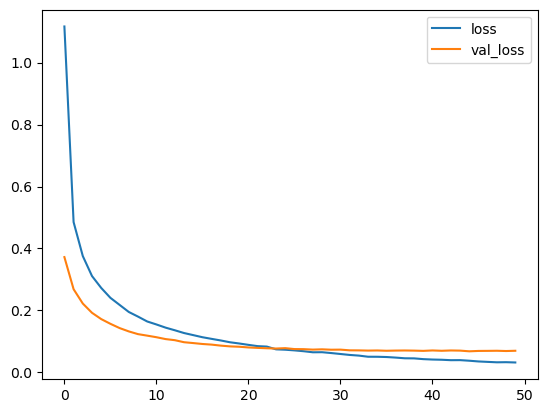

In [24]:
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

### Evolução da Acurácia

- **Observação:**
  - A acurácia do conjunto de validação se aproxima da acurácia do conjunto de treino, sugerindo que o modelo está generalizando bem.

---

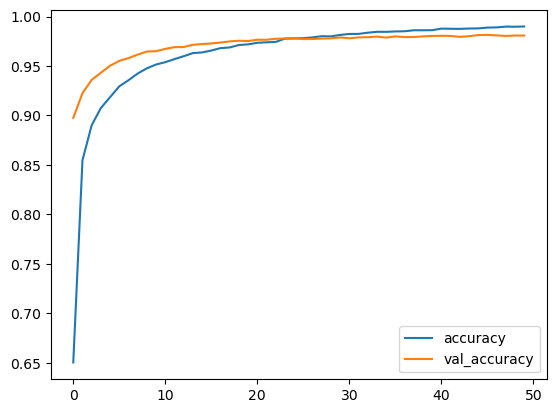

In [25]:
plt.plot(history.history["sparse_categorical_accuracy"], label="accuracy")
plt.plot(history.history["val_sparse_categorical_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [26]:
x_test[0].shape

(28, 28)

In [27]:
model.predict(np.expand_dims(x_test[0], axis=0))[0]

1/1 [==============================] - 0s 156ms/step


array([1.18175425e-08, 6.59542110e-08, 1.04718811e-06, 3.53009295e-06,
       1.07682176e-10, 5.30520028e-09, 4.87994124e-11, 9.99994755e-01,
       2.96785885e-09, 4.23258399e-07], dtype=float32)

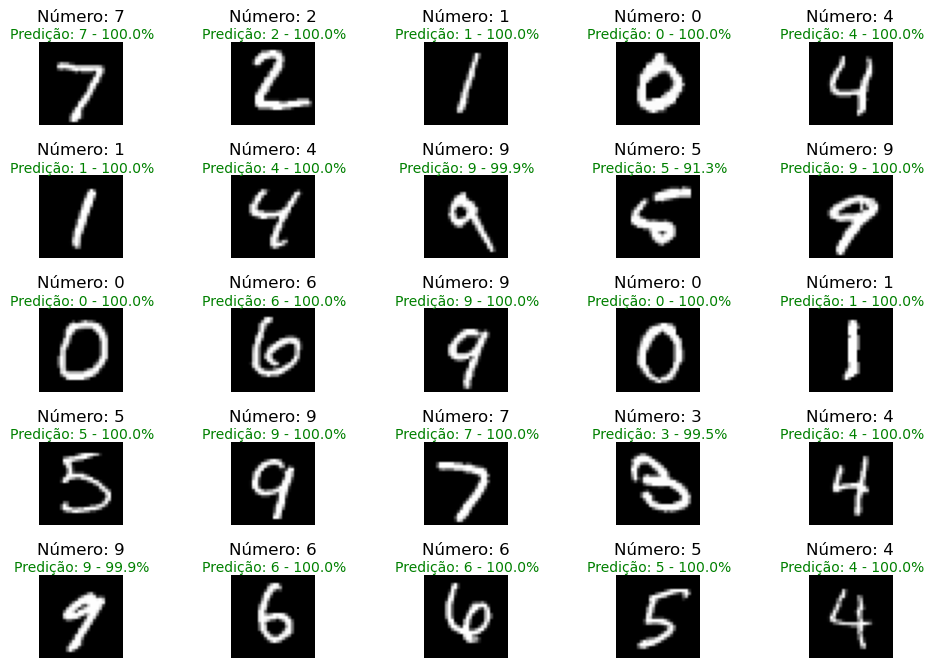

In [28]:
fig, axs = plt.subplots(5, 5, figsize=(12, 8))

for i, ax in enumerate(axs.flat):
    ax.imshow(x_test[i], cmap="gray")
    ax.set_title(f"Número: {y_test[i]}", pad=15)
    ax.axis("off")
    pred = model.predict(np.expand_dims(x_test[i], axis=0), verbose=0)[0]
    ax.text(
        14,
        -3,
        f"Predição: {pred.argmax()} - {pred.max():.1%}",
        color="green" if pred.argmax() == y_test[i] else "red",
        verticalalignment="center",
        horizontalalignment="center",

        
    )

fig.subplots_adjust(hspace=0.6)

plt.show()


## Resultados com Dados Externos

### Predições em Imagens Fora do MNIST
- **Análise:**
  - O modelo apresentou bom desempenho em imagens externas semelhantes às do MNIST.
  - Alguns erros ocorreram em casos de maior variação (espessura de traços ou ruído), indicando sensibilidade do modelo a dados fora do domínio original.

---


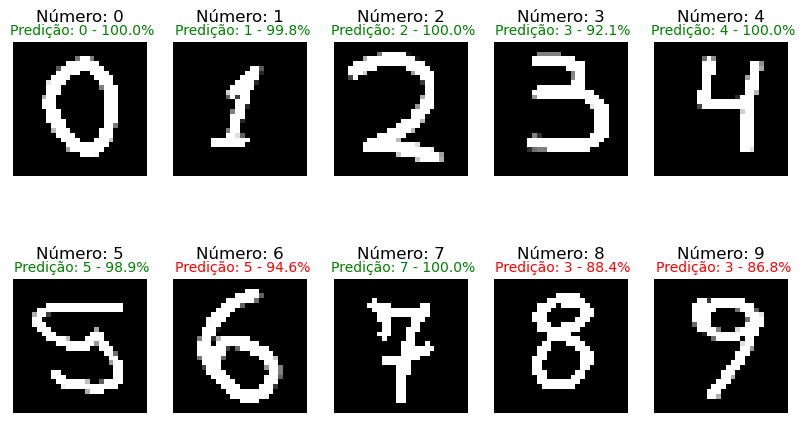

In [29]:
# Caminho para a pasta test_images dentro de PASTA_DADOS
test_images_dir = PASTA_DADOS / "test_images"


if not test_images_dir.exists():
    raise FileNotFoundError(f"A pasta {test_images_dir} não foi encontrada!")

fig, axs = plt.subplots(2, 5, figsize=(10, 5))

all_pred = {}


for i, (img, ax) in enumerate(zip(sorted(test_images_dir.glob("*.png")), axs.flat)):
    name = img.name.split(".")[0]
    img = keras.preprocessing.image.load_img(
        img, target_size=(28, 28), color_mode="grayscale"
    )

    img_array = keras.preprocessing.image.img_to_array(img)
    img_array = 255 - img_array  
    img_array = tf.expand_dims(img_array, 0)


    pred = model.predict(img_array, verbose=0)
    all_pred[name] = pred


    ax.imshow(img_array[0], cmap="gray")
    ax.set_title(f"Número: {name}", pad=15)
    ax.axis("off")
    ax.text(
        14,
        -3,
        f"Predição: {pred.argmax()} - {pred.max():.1%}",
        color="green" if str(pred.argmax()) == name else "red",
        verticalalignment="center",
        horizontalalignment="center",
    )

fig.subplots_adjust(hspace=0.6)

plt.show()